In [ ]:
# Export csv
write.csv(diffs_01,"diffOverview.csv", row.names = FALSE)

In [ ]:
# View how factor labels and numeric levels match up.
print(levels(authorData$cultural_heritage))
print(levels(docData$cultural_heritage))

In [ ]:
# Return values for multiple variables where value for a variable is included in a list
peeps  <- unique(diffs$docauthorid[diffs$values.y == ""])
summary(authorData[authorData$docauthorid[peeps],c("docauthorid", "docauthorname", "cultural_heritage")])

In [ ]:
# Subset where string is contained within one variable or another
subset(df, grepl('string',var1) | grepl('string',var2), )

In [ ]:
# Elements in x but not y
setdiff(x, y)

In [ ]:
# IDs by briefname
letters %>%
  group_by(briefname) %>%
  summarise(n_distinct(docauthorid))

In [ ]:
subset(letters[is.na(letters$briefname), 
               c("docauthorid", "docyear", "broadsubj")],
       docauthorid %in% c('per0031180','per0004486', 'per0031175', 'per0032241'))

In [ ]:
# Previously identified topics and subjects
topics  <- c("allsubject", "topicsubj", "broadsubj", "personalevent") 
#Get summary info (which shows NAs and other forms of missing data)
summary(letters[topics])

In [ ]:
demoGs  <- c("authorgender", 
             "cultural_heritage", 
             "native_occupation", 
             "north_american_occupation", 
             "agewriting", 
             "authrace", 
             "religion", 
             "marriagestatus", 
             "maternalstatus", 
             "wwritten")
summary(letters[demoGs])

In [ ]:
#Who's writing so much from Missoula?
summary(subset(letters, grepl('Missoula',wwritten)))
#This is a Japanese immigrant who appears to have been in an internment camp sending letters. Letters are sent exclusively within the United States.
#Decision: Keep because they represent a low-agency migrant displaced in-country. An important migrant voice.

In [ ]:
#Isolate immigration data
fig1a <- data.frame(letters$yearimmigration, letters$docauthorid, letters$docid)
#Remove duplicates
fig1b <- fig1a[unique(fig1a$letters.docauthorid),]
#Add reference column to doc year data
fig1c <- data.frame(letters$docyear, letters$docid)
#Merge dataframes
fig1d <- merge(fig1b, fig1c, all.y = TRUE)
#Drop unnecessary columns
fig1e <- fig1d[-c(1,3)]
#Rename columns to work with legend
colnames(fig1e) = c("Immigration", "Writing")
fig1f <- gather(fig1e,key = "Activity", value = Year, 1:2)
ggplot(fig1f) +
  geom_histogram(aes(x=Year, fill=Activity),
                 binwidth = 2,
                 colour="grey60", 
                 alpha=.5, 
                 position="identity") + 
labs(title="Dataset Timeframe")

In [ ]:
ggplot(fig1f, aes(x=Year, fill=Activity)) +
geom_histogram(binwidth = 2, colour="grey60", alpha=.5, position="identity", aes(y = ..density..), na.rm = TRUE)+
geom_density(alpha = .2, na.rm = TRUE) +   
labs(title="Dataset Timeframe")

In [ ]:
hist(letters$docyear, breaks = 100)

In [ ]:
names = multipleIDs[multipleIDs$docauthorid > 1, "briefname"]
subset(letters, briefname %in% names) 

In [ ]:
# Change column names for legend
colnames(fig1g) = c("Immigration", "Letter")
# Recode year data into factor
fig1h <- gather(fig1g,key = "Activity", value = Year, 1:2)
# Plot it
ggplot(fig1h, aes(x=Year, fill=Activity)) +
geom_histogram(binwidth = 2, 
               colour="grey60", 
               alpha=.5, 
               position="identity", 
               aes(y = ..density..), 
               na.rm = TRUE)+
geom_density(alpha = .2, na.rm = TRUE) +   
theme(legend.position=c(.9,.75)) +  
geom_label(
    label="1856", 
    x=1856,
    y=.1,
    color = "black",
    fill="white",
    hjust="center"
  ) +  
geom_label(
    label="1832", 
    x=1832,
    y=.05,
    color = "black",
    fill="white",
    hjust="right"
  )+  
geom_label(
    label="1836", 
    x=1836,
    y=.05,
    color = "black",
    fill="white",
    hjust="left"
  )+  
geom_label(
    label="1857-64", 
    x=1860,
    y=.025,
    color = "black",
    fill="white",
    hjust="center"
  )

In [ ]:
nrow(subset(table_03, Agricultural == TRUE & 
             Industrial != TRUE &
             Commercial != TRUE &
             Professional != TRUE &
             Domestic != TRUE &
             Social != TRUE &
             Government != TRUE))

nrow(subset(table_03, Industrial == TRUE & 
             Agricultural != TRUE &
             Commercial != TRUE &
             Professional != TRUE &
             Domestic != TRUE &
             Social != TRUE &
             Government != TRUE))

nrow(subset(table_03, Commercial == TRUE & 
            Agricultural != TRUE &
             Industrial != TRUE &
             Professional != TRUE &
             Domestic != TRUE &
             Social != TRUE &
             Government != TRUE))

nrow(subset(table_03, Professional == TRUE & 
            Agricultural != TRUE &
             Industrial != TRUE &
             Commercial != TRUE &
             Domestic != TRUE &
             Social != TRUE &
             Government != TRUE))

nrow(subset(table_03, Domestic == TRUE & 
            Agricultural != TRUE &
             Industrial != TRUE &
             Commercial != TRUE &
             Professional != TRUE &
             Social != TRUE &
             Government != TRUE))

nrow(subset(table_03, Social == TRUE & 
            Agricultural != TRUE &
             Industrial != TRUE &
             Commercial != TRUE &
             Professional != TRUE &
             Domestic != TRUE &
             Government != TRUE))

nrow(subset(table_03, Government == TRUE & 
            Agricultural != TRUE &
             Industrial != TRUE &
             Commercial != TRUE &
             Professional != TRUE &
             Domestic != TRUE &
             Social != TRUE))

In [ ]:

           
                      "Industrial&Commercial&Domestic&Social" = 0,
           "Industrial&Commercial&Domestic&Government" = 0,
           "Industrial&Commercial&Social&Government" = 0,
           "Industrial&Professional&Domestic&Social" = 0,
           "Industrial&Professional&Social&Government" = 0,
           "Industrial&Domestic&Social&Government" = 0,
                    "Commercial&Professional&Domestic&Social" = 0, 
                    "Commercial&Professional&Domestic&Government" = 0,
                    "Commercial&Professional&Social&Government" = 0, 
                    "Commercial&Domestic&Social&Government" = 0, 
                    "Professional&Domestic&Social&Government" = 0, 
           "Agricultural&Industrial&Commercial&Professional&Domestic" = 0,
           "Agricultural&Industrial&Commercial&Professional&Social" = 0,
           "Agricultural&Industrial&Commercial&Professional&Government" = 0,
           "Agricultural&Industrial&Professional&Domestic&Social" = 0,
           "Agricultural&Industrial&Professional&Domestic&Government" = 0,
           "Agricultural&Industrial&Domestic&Social&Government" = 0,
           "Agricultural&Commercial&Professional&Domestic&Social" = 0,
           "Agricultural&Commercial&Professional&Domestic&Government" = 0,
           "Agricultural&Professional&Domestic&Social&Government" = 0,
           "Industrial&Commercial&Professional&Domestic&Social" = 0,
           "Industrial&Commercial&Professional&Domestic&Government" = 0,
           "Industrial&Professional&Domestic&Social&Government" = 0,
                    "Commercial&Professional&Domestic&Social&Government" = 0,
           "Agricultural&Industrial&Commercial&Professional&Domestic&Social" = 0,
           "Agricultural&Industrial&Commercial&Professional&Domestic&Government" = 0,
           "Agricultural&Commercial&Professional&Domestic&Social&Government" = 0,
           "Industrial&Commercial&Professional&Domestic&Social&Government" = 0,  
           "Agricultural&Industrial&Commercial&Professional&Domestic&Social&Government" = 0,
           
           
           
           "Agricultural&Domestic" = 0,
           "Agricultural&Social" = 0,
           "Agricultural&Government" = 0,
           "Industrial&Commercial" = 0,
           
           "Industrial&Domestic" = 0,
           "Industrial&Social" = 0,
           
                    "Commercial&Professional" = 0, 
                    "Commercial&Domestic" = 0, 
                    
                    "Commercial&Government" = 0, 
                    "Professional&Domestic" = 0, 
                    
                    "Professional&Government" = 0,
                    "Domestic&Government" = 0, 
                    
           "Agricultural&Industrial&Commercial" = 0,
           "Agricultural&Industrial&Professional" = 0,
           "Agricultural&Industrial&Domestic" = 0,
           "Agricultural&Industrial&Social" = 0,
           "Agricultural&Industrial&Government" = 0,
           "Agricultural&Commercial&Professional" = 0,
           "Agricultural&Commercial&Domestic" = 0,
           "Agricultural&Commercial&Social" = 0,
           "Agricultural&Commercial&Government" = 0,
           "Agricultural&Professional&Domestic" = 0,
           "Agricultural&Professional&Social" = 0,
           
           "Agricultural&Domestic&Social" = 0,
           "Agricultural&Domestic&Government" = 0,
           "Agricultural&Social&Government" = 0,
           "Industrial&Commercial&Professional" = 0,
           "Industrial&Commercial&Domestic" = 0,
           "Industrial&Commercial&Social" = 0,
           "Industrial&Commercial&Government" = 0,
           "Industrial&Professional&Domestic" = 0,
           "Industrial&Professional&Social" = 0,
           "Industrial&Professional&Government" = 0,  
           "Industrial&Domestic&Social" = 0,
           "Industrial&Domestic&Government" = 0,  
           "Industrial&Social&Government" = 0,
                    "Commercial&Professional&Domestic" = 0, 
                    
                    
                    "Commercial&Domestic&Social" = 0,
                    "Commercial&Domestic&Government" = 0, 
                    "Commercial&Social&Government" = 0, 
                    "Professional&Domestic&Social" = 0, 
                    "Professional&Domestic&Government" = 0, 
                    "Professional&Social&Government" = 0, 
                    "Domestic&Social&Government" = 0, 
           "Agricultural&Industrial&Commercial&Professional" = 0,
           "Agricultural&Industrial&Commercial&Domestic" = 0,
           "Agricultural&Industrial&Commercial&Social" = 0,
           "Agricultural&Industrial&Commercial&Government" = 0,
           "Agricultural&Industrial&Professional&Domestic" = 0,
           "Agricultural&Industrial&Professional&Social" = 0,
           "Agricultural&Industrial&Professional&Government" = 0,
           "Agricultural&Industrial&Domestic&Social" = 0,
           "Agricultural&Industrial&Domestic&Government" = 0,
           "Agricultural&Industrial&Social&Government" = 0,
           "Agricultural&Commercial&Professional&Domestic" = 0,
           
           "Agricultural&Commercial&Professional&Government" = 0,
           "Agricultural&Commercial&Domestic&Social" = 0,
           "Agricultural&Commercial&Domestic&Government" = 0,
           "Agricultural&Commercial&Social&Government" = 0,
           "Agricultural&Professional&Domestic&Social" = 0,
           "Agricultural&Professional&Domestic&Government" = 0,
           "Agricultural&Professional&Social&Government" = 0,
           "Agricultural&Domestic&Social&Government" = 0,
           "Industrial&Commercial&Professional&Domestic" = 0,
           "Industrial&Commercial&Professional&Social" = 0
           

In [ ]:
# Specific library
library(UpSetR)

input <- c(Commercial = 30,
           Professional = 15, 
           Domestic = 5, 
           Social = 25, 
           Government = 7, 
                    "Commercial&Professional" = 8, # 6 from c(1,2,4) & 2 from c(1,2,5)
                    "Commercial&Domestic" = 0, 
                    "Commercial&Social" = 7, # 6 from c(1,2,4) + 1 from c(1,4)
                    "Commercial&Government" = 2, # 2 from c(1,2,5)
                    "Professional&Domestic" = 0, 
                    "Professional&Social" = 7, # 6 from c(1,2,4) + 1 from c(2,4)
                    "Professional&Government" = 3, # 2 from c(1,2,5) + 1 from c(2,5)
                    "Domestic&Social" = 1, 
                    "Domestic&Government" = 0, 
                    "Social&Government" = 1,
                    "Commercial&Professional&Domestic" = 0, 
                    "Commercial&Professional&Social" = 6, # Main
                    "Commercial&Professional&Government" = 2, # Main
                    "Commercial&Domestic&Social" = 0,
                    "Commercial&Domestic&Government" = 0, 
                    "Commercial&Social&Government" = 0, 
                    "Professional&Domestic&Social" = 0, 
                    "Professional&Domestic&Government" = 0, 
                    "Professional&Social&Government" = 0, 
                    "Domestic&Social&Government" = 0, 
                    "Commercial&Professional&Domestic&Social" = 0, 
                    "Commercial&Professional&Domestic&Government" = 0,
                    "Commercial&Professional&Social&Government" = 0, 
                    "Commercial&Domestic&Social&Government" = 0, 
                    "Professional&Domestic&Social&Government" = 0, 
                    "Commercial&Professional&Domestic&Social&Government" = 0
           )

# Plot
upset(fromExpression(input), 
      nintersects = 26, 
      nsets = 5, 
      order.by = "freq", 
      decreasing = T, 
      mb.ratio = c(0.6, 0.4),
      number.angles = 0, 
      text.scale = 1.1, 
      point.size = 2.8, 
      line.size = 1
      )

In [ ]:
# Specific library
library(UpSetR)

tiff(file="20201214_Occupations.tiff")


input <- c("Domestic&Social" = 1, #1 
           Social = 15, #2
           Commercial = 15, #7
           Industrial = 4, #15
           Agricultural = 24, #22
           Domestic = 4, #24
           "Commercial&Social" = 7, #34
           "Agricultural&Professional&Government" = 1, #37
           "Commercial&Professional&Social" = 6, #40
           "Agricultural&Commercial&Professional&Social" = 4, #42
           "Industrial&Commercial&Professional&Government" = 1, # 46  
           "Social&Government" = 1, #48
           "Agricultural&Commercial" = 10, #52
           "Agricultural&Industrial" = 3, #55
           "Professional&Social" = 7, #57
           "Industrial&Government" = 2, #96
           Professional = 4, #106
           Government = 2, #128
           "Agricultural&Professional" = 6, #152
           "Industrial&Professional" = 1, #198
           "Commercial&Professional&Government" = 2 #203 
           )

# Plot
upset(fromExpression(input), 
      nintersects = 108, 
      nsets = 7, 
      order.by = "freq", 
      decreasing = T, 
      mb.ratio = c(0.6, 0.4),
      number.angles = 0, 
      text.scale = 1.1, 
      point.size = 2.8, 
      line.size = 1
      )

dev.off()

In [ ]:
nrow(subset(table_03, Domestic == TRUE & Social == TRUE)) #1 - Done
nrow(subset(table_03, Agricultural == FALSE & Industrial == FALSE & Commercial == FALSE & Professional == FALSE & Domestic == FALSE & Social == TRUE & Government == FALSE)) #2 - Done 
nrow(subset(table_03, is.na(Commercial) & is.na(Professional) & is.na(Domestic) & is.na(Social) & is.na(Government))) # 3 - All NAs
nrow(subset(table_03, Agricultural == FALSE & Industrial == FALSE & Commercial == TRUE & Professional == FALSE & Domestic == FALSE & Social == FALSE & Government == FALSE)) #7 - Done
nrow(subset(table_03, Agricultural == FALSE & Industrial == TRUE & Commercial == FALSE & Professional == FALSE & Domestic == FALSE & Social == FALSE & Government == FALSE)) #15 - Done
nrow(subset(table_03, Agricultural == TRUE & Industrial == FALSE & Commercial == FALSE & Professional == FALSE & Domestic == FALSE & Social == FALSE & Government == FALSE)) #22 - Done
nrow(subset(table_03, Agricultural == FALSE & Industrial == FALSE & Commercial == FALSE & Professional == FALSE & Domestic == TRUE & Social == FALSE & Government == FALSE)) #24 - Done
nrow(subset(table_03, Commercial == TRUE & Social == TRUE)) #34 - Done
nrow(subset(table_03, Agricultural == TRUE & Professional == TRUE & Government == TRUE)) #37 - Done
nrow(subset(table_03, Commercial == TRUE & Professional == TRUE & Social == TRUE)) #40 - Done
nrow(subset(table_03, Agricultural == TRUE & Commercial == TRUE & Professional == TRUE & Social == TRUE)) #42 - Done
nrow(subset(table_03, Industrial == TRUE & Commercial == TRUE & Professional == TRUE & Government == TRUE)) #46 - Done
nrow(subset(table_03, Social == TRUE & Government == TRUE)) #48 - Done
nrow(subset(table_03, Agricultural == TRUE & Commercial == TRUE)) #52 - Done
nrow(subset(table_03, Agricultural == TRUE & Industrial == TRUE)) #55 - Done
nrow(subset(table_03, Professional == TRUE & Social == TRUE)) #57 - Done
nrow(subset(table_03, Industrial == TRUE & Government == TRUE)) #96 - Done
nrow(subset(table_03, Agricultural == FALSE & Industrial == FALSE & Commercial == FALSE & Professional == TRUE & Domestic == FALSE & Social == FALSE & Government == FALSE)) #106 - Done
nrow(subset(table_03, Agricultural == FALSE & Industrial == FALSE & Commercial == FALSE & Professional == FALSE & Domestic == FALSE & Social == FALSE & Government == TRUE)) #128 -  Done
nrow(subset(table_03, Agricultural == TRUE & Professional == TRUE)) #152 - Done
nrow(subset(table_03, Industrial == TRUE & Professional == TRUE)) #198 - Done
nrow(subset(table_03, Commercial == TRUE & Professional == TRUE & Government == TRUE)) #203 - Done

In [ ]:
unique(subset(table_03, 
              select = c("Agricultural", 
                         "Industrial", 
                         "Commercial", 
                         "Professional", 
                         "Domestic", 
                         "Social", 
                         "Government"))) # Set 2: ALL

In [ ]:
# Number of classes (larger than number of writers because of multiple occupations)
24+(15*2)+10+(7*2)+(6*2)+(4*4)+3+(2*3)+(1*5)+125

In [ ]:
# Make table of origins and religions for distinct authors
unique(subset(table_03, select = c("A","I", "CCP", "Other"))) #Set 1

In [ ]:
nrow(subset(table_03, CCP == TRUE & Other == TRUE)) # 1- 3,4
nrow(subset(table_03, A == FALSE & I == FALSE & CCP == TRUE & Other == FALSE)) # 2 - only 3
nrow(subset(table_03, is.na(A) & is.na(I) & is.na(CCP) & is.na(Other))) # 3 - All NA
nrow(subset(table_03, A == FALSE & I == TRUE & CCP == FALSE & Other == FALSE)) # 15 - only 2
nrow(subset(table_03, A == FALSE & I == FALSE & CCP == FALSE & Other == TRUE)) # 19 - only 4
nrow(subset(table_03, A == TRUE & I == FALSE & CCP == FALSE & Other == FALSE)) # 22 - only 1
nrow(subset(table_03, A == TRUE & CCP == TRUE)) # 37 - 1,3
nrow(subset(table_03, I == TRUE & CCP == TRUE)) # 46 - 2,3
nrow(subset(table_03, A == TRUE & I == TRUE)) # 55 - 1,2

In [1]:
# What colours are in the Dark2 colorblind palette?
library(RColorBrewer)
brewer.pal(n = 8, name = "Dark2")

[1] "#1B9E77" "#D95F02" "#7570B3" "#E7298A" "#66A61E" "#E6AB02" "#A6761D"
[8] "#666666"

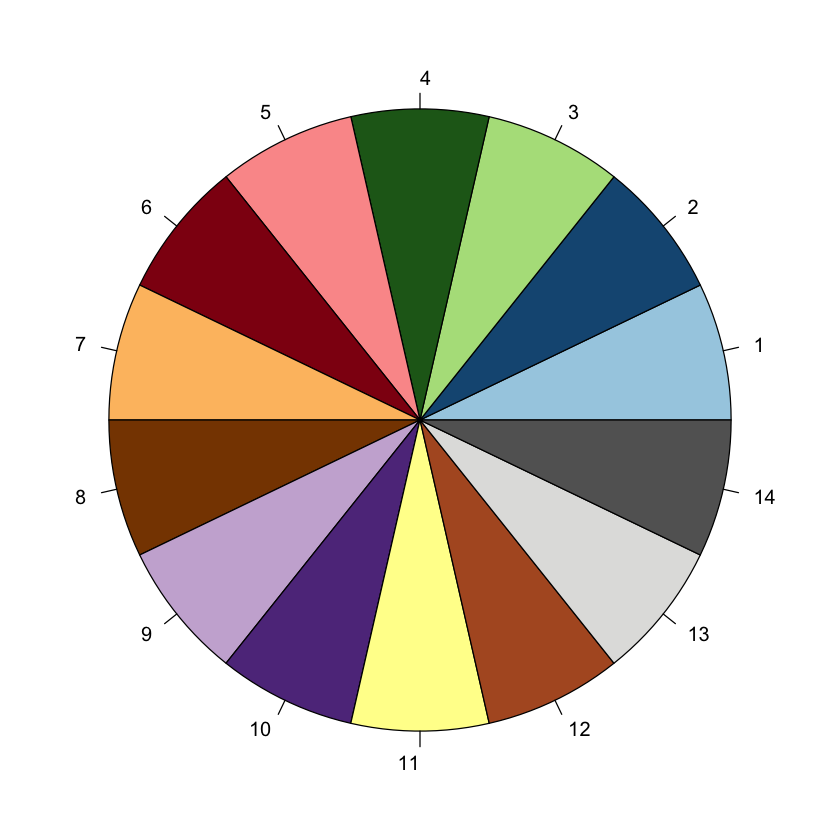

In [8]:
colourBlindCustom  <- c("#A6CEE3", #Light Blue
              "#165782", #Dark Blue
              "#B2DF8A", #Light Green
              "#21661C", #Dark Green
              "#FB9A99", #Pink
              "#8F1012", #Red
              "#FDBF6F", #Orange
              "#874400", #Brown
             "#CAB2D6", #Light Purple
              "#5F378A", #Dark Purple
              "#FFFF99", #Yellow,
              "#B15928", #Brown,
              "#E0E0DF", #Light Grey
              "#636363" #Dark Grey
             )

par(mar = rep(0, 4))
pie(rep(1, length(palette)), col = palette)

In [ ]:
# Library
library(VennDiagram) 
library(gridExtra)

# Erickson
vennPlot_01  <- draw.quad.venn(area1 = 39,
     area2 = 10,
     area3 = 57,
     area4 = 5,
n12 = 3,
n13 = 12,
n14 = 0,
n23 = 2,
n24 = 0,
n34 = 1,
n123 = 0,
n124 = 0,
n134 = 0,
n234 = 0, 
n1234 = 0,
fill = c("#1B9E77", 
         "#D95F02", 
         "#7570B3", 
         "#E7298A"), 
         category = c("Agricultural", 
             "Industrial", 
             "Commercial, Clerical, Professional", 
             "Other"),
         print.mode="percent"
         )

vennPlot_01

In [ ]:
tiff(filename = "20201214_AM_Occupations01.tiff", compression = "lzw");
    grid.draw(vennPlot_01);
    dev.off();

In [ ]:
# Take all cases in which there is a CCP or an Other
table_04 <- subset(table_03, CCP == TRUE | Other == TRUE)
nrow(table_04)

In [ ]:
# How many of the people have more than one occupation in classes other than agricultural and industrial
# Not including these classes because the counts are identical between Step 1 and Step 2.
# Hence the overlap between the subgroups in the Step 2 and the Ag/In classes is reflectedin the Venn for Step 1.
# This also simplies the diagram for Step 2, which would be too complex with 7 circles and intersections among them.
table(apply(table_04[c("Commercial", "Professional", "Domestic", "Social", "Government")], 1, sum))

In [ ]:
# How many extras are there?
5+(8*2)

In [ ]:
# Summary
summary(table_04[c("Commercial", "Professional", "Domestic", "Social", "Government")])

In [ ]:
# Check the counts
30+15+5+25+7
82-21

In [ ]:
# Examine overlapping classes.
unique(subset(table_04, select = c("Commercial", "Professional", "Domestic", "Social", "Government"))) #Set 2

In [ ]:
nrow(subset(table_04, Domestic == TRUE & Social == TRUE)) #3,4
nrow(subset(table_04, Commercial == TRUE & Social == TRUE)) #1,4
nrow(subset(table_04, Professional == TRUE & Government == TRUE)) #2,5
nrow(subset(table_04, Commercial == TRUE & Professional == TRUE & Social == TRUE)) #1,2,4
nrow(subset(table_04, Commercial == TRUE & Professional == TRUE & Government == TRUE)) #1,2,5
nrow(subset(table_04, Social == TRUE & Government == TRUE)) #4,5
nrow(subset(table_04, Professional == TRUE & Social == TRUE)) #2,4
nrow(subset(table_04, is.na(Commercial) & is.na(Professional) & is.na(Domestic) & is.na(Social) & is.na(Government)))

In [ ]:
tiff(filename = "20201214_AM_Occupations02.tiff");
    grid.draw(vennPlot_02);
    dev.off();

In [ ]:
# View Purple colorblind palette
display.brewer.pal(n = 9, name = 'PuRd')

# What colours are in the Purples colorblind palette?
brewer.pal(n = 9, name = "PuRd")

In [ ]:
# Counts to make sure correct
21+3+15+4+5 # Only 1 set
6+1+1+1+1+1+2 # Multiple sets

In [ ]:
vennPlot_02 <- draw.quintuple.venn(area1 = 30,
                    area2 = 15, 
                    area3 = 5, 
                    area4 = 25, 
                    area5 = 7, 
                    n12 = 8, # 6 from c(1,2,4) & 2 from c(1,2,5)
                    n13 = 0, 
                    n14 = 7, # 6 from c(1,2,4) + 1 from c(1,4)
                    n15 = 2, # 2 from c(1,2,5)
                    n23 = 0, 
                    n24 = 7, # 6 from c(1,2,4) + 1 from c(2,4)
                    n25 = 3, # 2 from c(1,2,5) + 1 from c(2,5)
                    n34 = 1, 
                    n35 = 0, 
                    n45 = 1,
                    n123 = 0, 
                    n124 = 6, # Main
                    n125 = 2, # Main
                    n134 = 0,
                    n135 = 0, 
                    n145 = 0, 
                    n234 = 0, 
                    n235 = 0, 
                    n245 = 0, 
                    n345 = 0, 
                    n1234 = 0, 
                    n1235 = 0,
                    n1245 = 0, 
                    n1345 = 0, 
                    n2345 = 0, 
                    n12345 = 0,
                    fill = c('#E7298A', '#C994C7', '#E7E1EF', '#DF65B0', '#D4B9DA'),
                    category = c("Commercial (30)", "Professional (15)", "Domestic (5)", "Social (25)", "Government (7)"),
                    cat.pos = c(0,335,225,130,25)
              )
vennPlot_02

In [1]:
library(tidyverse)
library(hrbrthemes)
library(viridis)

Warning message:
“package ‘tidyverse’ was built under R version 3.5.2”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.2
✔ tidyr   1.0.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘tidyr’ was built under R version 3.5.2”
Warning message:
“package ‘stringr’ was built under R version 3.5.2”
Warning message:
“package ‘forcats’ was built under R version 3.5.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘hrbrthemes’ was built under R version 3.5.2”
NOTE: Either Arial Narrow or Roboto Condensed fonts are required to use these themes.

      Please use hrbrthemes::import_roboto_condensed() to install Roboto Condensed and

      if Arial Narrow is not on your system, please see https://bit.ly/arialnarrow

Loading

In [2]:
data <- data.frame(
  name=c( rep("A",500), rep("B",500), rep("B",500), rep("C",20), rep('D', 100)  ),
  value=c( rnorm(500, 10, 5), rnorm(500, 13, 1), rnorm(500, 18, 1), rnorm(20, 25, 4), rnorm(100, 12, 1) )
)

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial Narrow' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial Narrow' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial Narrow' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial Narrow' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial Narrow' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial Narrow' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial Narr

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial Narrow' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial Narrow' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial Narrow' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial Narrow' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial Narrow' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial Narrow' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial Narr

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial Narrow' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial Narrow' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial Narrow' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial Narrow' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial Narrow' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial Narrow' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial Narr

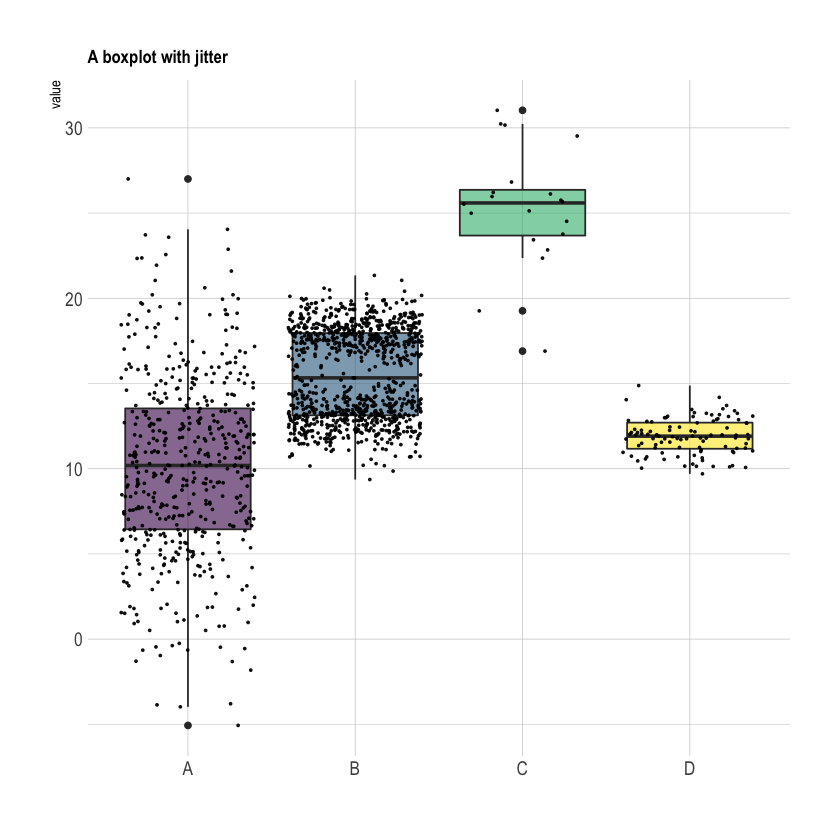

In [4]:
data %>%
  ggplot( aes(x=name, y=value, fill=name)) +
    geom_boxplot() +
    scale_fill_viridis(discrete = TRUE, alpha=0.6) +
    geom_jitter(color="black", size=0.4, alpha=0.9) +
    theme_ipsum() +
    theme(
      legend.position="none",
      plot.title = element_text(size=11)
    ) +
    ggtitle("A boxplot with jitter") +
    xlab("")

In [ ]:
# Library
library(ggridges)

# Plot
authorAge %>%
  ggplot( aes(y=authorgender, x=agewriting, fill=authorgender)) +
    geom_density_ridges() +
    theme_ridges() +
    xlab("Gender") +
ylab("Age")

ggsave("20201217_AM_AgeGender.png")

In [ ]:
pkg  = tibble::tibble(
  Package = names(installed.packages()[,3]),
  Version = unname(installed.packages()[,3])
)

In [ ]:
dplyr::filter(pkg, Package %in% c("tidyverse", "dplyr"))

In [ ]:
scale_fill_viridis(discrete = TRUE, alpha=0.6) +

In [ ]:
# Agricultural - Erickson
rows = which(grepl(paste(A,collapse="|"), letters$northamericanoccupation)) # Get rows that meet condition
letters['A'] <- NA # Make binary variable for occupation class
letters$A[rows] <- "A" # Recode data
summary(as.factor(letters$A))

# Agricultural - Erickson + Miller
rows = which(grepl(paste(Agricultural,collapse="|"), letters$northamericanoccupation)) # Get rows that meet condition
letters['Agricultural'] <- NA # Make binary variable for occupation class
letters$Agricultural[rows] <- "Agricultural" # Recode data
summary(as.factor(letters$Agricultural))

# Industrial - Erickson
rows = which(grepl(paste(I,collapse="|"), letters$northamericanoccupation)) # Get rows that meet condition
letters['I'] <- NA # Make binary variable for occupation class
letters$I[rows] <- "I" # Recode data
summary(as.factor(letters$I))

# Industrial - Erickson + Miller
rows = which(grepl(paste(Industrial,collapse="|"), letters$northamericanoccupation)) # Get rows that meet condition
letters['Industrial'] <- NA # Make binary variable for occupation class
letters$Industrial[rows] <- "Industrial" # Recode data
summary(as.factor(letters$Industrial))

# CCP - Erickson
rows = which(grepl(paste(CCP,collapse="|"), letters$northamericanoccupation)) # Get rows that meet condition
letters['CCP'] <- NA # Make binary variable for occupation class
letters$CCP[rows] <- "CCP" # Recode data
summary(as.factor(letters$CCP))

# Commercial - Erickson + Miller
rows = which(grepl(paste(Commercial,collapse="|"), letters$northamericanoccupation)) # Get rows that meet condition
letters['Commercial'] <- NA # Make binary variable for occupation class
letters$Commercial[rows] <- "Commercial" # Recode data
summary(as.factor(letters$Commercial))

# Professional - Erickson + Miller
rows = which(grepl(paste(Professional,collapse="|"), letters$northamericanoccupation)) # Get rows that meet condition
letters['Professional'] <- NA # Make binary variable for occupation class
letters$Professional[rows] <- "Professional" # Recode data
summary(as.factor(letters$Professional))

# Service - Erickson + Miller
rows = which(grepl(paste(Domestic,collapse="|"), letters$northamericanoccupation)) # Get rows that meet condition
letters['Domestic'] <- NA # Make binary variable for occupation class
letters$Domestic[rows] <- "Domestic" # Recode data
summary(as.factor(letters$Domestic))

# Social - Erickson + Miller
rows = which(grepl(paste(Social,collapse="|"), letters$northamericanoccupation)) # Get rows that meet condition
letters['Social'] <- NA # Make binary variable for occupation class
letters$Social[rows] <- "Social" # Recode data
summary(as.factor(letters$Social))

# Government - Erickson + Miller
rows = which(grepl(paste(Government,collapse="|"), letters$northamericanoccupation)) # Get rows that meet condition
letters['Government'] <- NA # Make binary variable for occupation class
letters$Government[rows] <- "Government" # Recode data
summary(as.factor(letters$Government))

# Other - Erickson
rows = which(grepl(paste(Other,collapse="|"), letters$northamericanoccupation)) # Get rows that meet condition
letters['Other'] <- NA # Make binary variable for occupation class
letters$Other[rows] <- "Other" # Recode data
summary(as.factor(letters$Other))

In [ ]:
scale_fill_manual(values = c("#FFFF99","#165782"))

In [ ]:
# How do these counts add up?
sum(table(subset(letters, religionNew == "Catholic", select = nationalOrigin)))
sum(table(subset(letters, religionNew == "Protestant", select = nationalOrigin)))
sum(table(subset(letters, religionNew == "Protestant" | religionNew == "Christian", select = nationalOrigin)))
sum(table(subset(letters, religionNew == "Christian", select = nationalOrigin)))
sum(table(subset(letters, religionNew == "Jewish", select = nationalOrigin))) + 13 #Adding the NAs bc omitted from sum
sum(is.na(letters$religionNew))

In [ ]:
# arrival years over unique authors
letters %>% 
distinct(docauthorid, .keep_all = T) %>% 
count(yearimmigration, sort = TRUE)

In [2]:
uniqueAuthors %>%
unfactorize() %>%
select(all_of(vars)) %>%
summary()

ERROR: Error in uniqueAuthors %>% unfactorize() %>% select(all_of(vars)) %>% : could not find function "%>%"


In [ ]:
locationGender.collection <- ggplot(data=authorAge, aes(x=authorLocation, fill=authorgender)) +
geom_bar(stat="count")+ 
xlab("Location of Writer") +
scale_fill_manual(values=c("#A6CEE3","#165782"),
                  name="Gender",
                  labels=c("Female", "Male")) 
locationGender.collection

In [ ]:
locationGender.author <- ggplot(data=uniqueAuthors, aes(x=authorLocation, fill=authorgender)) +
geom_bar(stat="count")+ 
xlab("Location of Writer") +
scale_fill_manual(values=c("#A6CEE3","#165782"),
                  name="Gender",
                  labels=c("Female", "Male")) 
locationGender.author

In [ ]:
cowplot::plot_grid(locationGender.author, locationGender.collection)

In [ ]:
ageWriting <- letters %>% ggplot(aes(x=agewriting)) +
geom_histogram(binwidth = 1, 
               fill="#1B9E77",
               colour="grey60", 
               alpha=.5, 
               position="identity", 
               aes(y = ..density..), 
               na.rm = TRUE)+
geom_density(fill="#1B9E77", color="black", alpha = .3, na.rm = TRUE)+ 
scale_fill_brewer(palette = "Set2") +
xlab("Age at Writing") +
geom_vline(xintercept=43, color = "Red")
ageWriting

In [ ]:
hist(letters$sinceMigration, breaks = 24)

In [ ]:
#How many migrant letters from Canada?
nrow(filter(letters, grepl('Canada',wwritten) & !(grepl('United States',wwritten))))
nrow(filter(letters, grepl('Canada',wwritten) & !(grepl('United States',wwritten)))) / 915
#How many migrant letters from the United States
nrow(filter(letters, grepl('United States',wwritten)))
nrow(filter(letters, grepl('United States',wwritten))) / 915
#How many migrant letters from Mexico
nrow(filter(letters, grepl('Mexico',wwritten) & !(grepl('United States',wwritten))))
nrow(filter(letters, grepl('Mexico',wwritten) & !(grepl('United States',wwritten)))) / 915

In [ ]:
# Get the highest value in the docsequence for each docauthorid.
# This is the last letter (in theory)
lastLetters<-by(endSeries, endSeries$docauthorid, tail, n=1)
lastLetters
highestd<-do.call("rbind", as.list(highest))
highestd

In [ ]:
# Summary of potentially useful variables
vars  <- c("docsequence", "docid", "docyear", "docauthorid")

# Working DF
endSeries <- letters %>%
factorize() %>%
select(all_of(vars)) 
glimpse(endSeries)

# Summary
summary(endSeries)

In [ ]:
# Put docids from metadata into a list
docIDs <- letters$docid

# Check to make sure there are no duplicates
length(docIDs)
length(unique(docIDs))

# Get rows for those IDs
rows = which(grepl(paste(docIDs,collapse="|"), monthDay$docid))
length(rows)

In [ ]:
# Change class of date variables from integer to character
letters$docyear <- as.character(letters$docyear)
letters$docmonth <- as.character(letters$docmonth)
letters$docday <- as.character(letters$docday)
vars  <- c("docyear", "docmonth", "docday")
str(letters[vars])

In [ ]:
# Unique Authors
uniqueAuthors <- letters %>% 
factorize() %>%
distinct(docauthorid, .keep_all = T)

In [ ]:
# Check data types
str(letters[vars])

In [ ]:
# Put IDs to check into a list
ids2check  <- c("per0035783", "per0035762", "per0035803")

# Get rows for those letterDates
rows = which(grepl(paste(ids2check,collapse="|"), highestVals.df$docyear))
highestVals.df[rows]

In [ ]:
highestVals.df %>%
select(docyear)

In [ ]:
highestVals.df %>%
filter(!is.na(docDate)) %>%
nrow()